# Chapter 12: k-nearest neighbours

Given a set of data points in some space and a set of labels for each point, predict the label of an additional point based on the labels of its k-nearest neighbours (this requires a metric of distance in that space). 

### Import stuff:

In [124]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

### Functions

In [105]:
def measure_distance(vec_1,vec_2):
    """ Compute Euklidian separation between two vectors. Input are numpy arrays. """
    vec_3 = vec_1 - vec_2
    distance = np.sqrt((vec_3**2).sum())
    return distance

def majority_label(labels):
    """ Return most frequent value among 'labels'. In case of draw, remove last value and repeat. """
    # find label occuring most often
    counts = Counter(labels)
    winner, winner_count = counts.most_common(1)[0]
    # check if there is multible labels with the same count as winner
    all_winners = [x for x in counts if counts[x] == winner_count]
    # if only one winner, return most frequent label
    if len(all_winners) == 1:
        return winner
    # if not, remove furthest neighbour and repeat
    majority_label(labels[:-1])
    
def k_nearest_neighbours(data_set, new_point, k):
    """ Find the 'k' nearest neighbours of 'new_point' and tne most common label among them. """
    by_distance = sorted(data_set, key=lambda x: measure_distance(np.array(x[0]),np.array(new_point)))
    # list of labels of the k nearest neighbours
    labels = [ label for _, label in by_distance[:k]]
    # compute most frequent label among the k nearest neighbours
    return(majority_label(labels))

### Example: Programming language preferences across the US

Data set of cities and preferred programming languages. Entries are ([longiture, latitude],language).

In [111]:
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

Plot data set on top of US map:

<IPython.core.display.Javascript object>


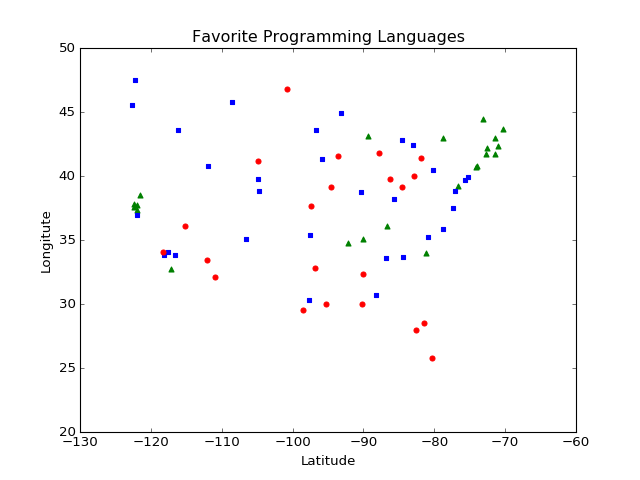

FileNotFoundError: [Errno 2] No such file or directory: 'states.txt'

In [127]:
# make a dictionary for making three scatter plots (one for each language)
# key is language, value is pair (longitudes, latitudes)
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
# we want each language to have a different marker and color
markers = { "Java" : "o", "Python" : "s", "R" : "^" }
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)

fig,ax = plt.subplots(1,1)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitute')
    
# create a scatter series for each language
for language, (x, y) in plots.items():
    ax.scatter(x, y, color=colors[language], marker=markers[language],
    label=language, zorder=10)

ax.set_title("Favorite Programming Languages")

